1. 데이터 리모델링과 처리
- 주어진 데이터를 pandas DataFrame으로 만들고, groupby 기능을 이용해 Year별 총 Sales를 구하세요.
- 구한 결과를 바탕으로, Year별 총 매출을 Total_Sales라는 새로운 컬럼으로 추가한 DataFrame을 출력하세요.
- - 데이터:
Year | Quarter | Sales
---------------------
2023 | Q1      | 200
2023 | Q2      | 300
2023 | Q3      | 250

2. 정형 데이터와 비정형 데이터 처리
[정형 데이터 처리]
- 주어진 데이터를 DataFrame으로 만들고, Age가 30세 이상(>= 30), Salary가 5만 이상(>= 50000)인 직원만 필터링한 DataFrame을 만드세요.
- 필터링된 결과에서, 직원의 Name, Age, Department 컬럼만 출력하세요(또는 필요한 컬럼만).
- - 데이터:
data = {
    "ID": [1, 2, 3, 4, 5],
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve"],
    "Age": [25, 32, 45, 29, 40],
    "Department": ["HR", "Finance", "IT", "Marketing", "IT"],
    "Salary": [48000, 52000, 60000, 45000, 70000]
}[비정형 데이터 처리]
- API에서 JSON 데이터를 가져와 DataFrame으로 변환 후 아래 필드를 추출해 새로운 DataFrame을 만드세요.
- - id → ID
- - name → Name
- - username → Username
- - email → Email
- - address.city → City
- - company.name → Company
- City가 "Lebsackbury" 또는 "Roscoeview"에 해당하는 사용자만 필터링하세요.
- 필터링된 DataFrame을 CSV 파일로 저장하세요.

- - API: https://jsonplaceholder.typicode.com/users


3. 시각화 및 시계열 데이터 활용
- 아래 데이터를 pandas와 matplotlib를 사용해 시계열 그래프로 시각화하세요.
- - 데이터:
Date       | Price
-----------------
2023-01-01 | 100
2023-02-01 | 120
2023-03-01 | 130
2023-04-01 | 125
2023-05-01 | 140
- - X축은 날짜, Y축은 가격으로 설정하고, 가격의 추세를 선 그래프로 나타내세요.



In [78]:
# 1. 데이터 리모델링과 처리
# - 주어진 데이터를 pandas DataFrame으로 만들고, groupby 기능을 이용해 Year별 총 Sales를 구하세요.
# - 구한 결과를 바탕으로, Year별 총 매출을 Total_Sales라는 새로운 컬럼으로 추가한 DataFrame을 출력하세요.
# - - 데이터:
# Year | Quarter | Sales
# ---------------------
# 2023 | Q1      | 200
# 2023 | Q2      | 300
# 2023 | Q3      | 250

import pandas as pd

# 샘플 데이터
df1 = pd.DataFrame({
    'Year': ['2023', '2023', '2023', '2024', '2024'],
    'Quarter': ['Q1', 'Q2', 'Q3', 'Q1', 'Q2'],
    'Sales': [200, 300, 250, 100, 200]
})


df2 = df1.groupby('Year')['Sales'].sum().reset_index(name='Total_Sales')
print(df2)

result = pd.merge(df1, df2, on='Year', how='inner')
print(result)


   Year  Total_Sales
0  2023          750
1  2024          300
   Year Quarter  Sales  Total_Sales
0  2023      Q1    200          750
1  2023      Q2    300          750
2  2023      Q3    250          750
3  2024      Q1    100          300
4  2024      Q2    200          300


In [79]:
# 2. 정형 데이터와 비정형 데이터 처리
# [정형 데이터 처리]
# - 주어진 데이터를 DataFrame으로 만들고, Age가 30세 이상(>= 30), Salary가 5만 이상(>= 50000)인 직원만 필터링한 DataFrame을 만드세요.
# - 필터링된 결과에서, 직원의 Name, Age, Department 컬럼만 출력하세요(또는 필요한 컬럼만).
# - - 데이터:
# data = {
#     "ID": [1, 2, 3, 4, 5],
#     "Name": ["Alice", "Bob", "Charlie", "David", "Eve"],
#     "Age": [25, 32, 45, 29, 40],
#     "Department": ["HR", "Finance", "IT", "Marketing", "IT"],
#     "Salary": [48000, 52000, 60000, 45000, 70000]
# }[비정형 데이터 처리]
# - API에서 JSON 데이터를 가져와 DataFrame으로 변환 후 아래 필드를 추출해 새로운 DataFrame을 만드세요.
# - - id → ID
# - - name → Name
# - - username → Username
# - - email → Email
# - - address.city → City
# - - company.name → Company
# - City가 "Lebsackbury" 또는 "Roscoeview"에 해당하는 사용자만 필터링하세요.
# - 필터링된 DataFrame을 CSV 파일로 저장하세요.

# - - API: https://jsonplaceholder.typicode.com/users

import pandas as pd
import requests
import json



data = {
    "ID": [1, 2, 3, 4, 5],
    "Name": ["Alice", "Bob", "Charlie", "David", "Eve"],
    "Age": [25, 32, 45, 29, 40],
    "Department": ["HR", "Finance", "IT", "Marketing", "IT"],
    "Salary": [48000, 52000, 60000, 45000, 70000]
}

df = pd.DataFrame(data)

df1 = pd.DataFrame(data)[(df['Age'] >= 30) & (df['Salary'] >= 50000)] 
print(df1)

df2 = df1[['Name','Age','Department']]
print(df2)

response = requests.get('https://jsonplaceholder.typicode.com/users').json()
df3 = pd.DataFrame(response)[['id', 'name', 'username', 'email', 'address', 'company']]

df3['address'] = df3['address'].apply(lambda x: x['city'])
df3['company'] = df3['company'].apply(lambda x: x['name'])

df3.columns = ['ID', 'Name', 'Username', 'Email', 'City', 'Company']
print(df3)

df4 = df3[(df3['City'] == 'Lebsackbury') | (df3['City'] == 'Roscoeview')] 
print(df4)

df4.to_csv('data.csv', index=False)



   ID     Name  Age Department  Salary
1   2      Bob   32    Finance   52000
2   3  Charlie   45         IT   60000
4   5      Eve   40         IT   70000
      Name  Age Department
1      Bob   32    Finance
2  Charlie   45         IT
4      Eve   40         IT
   ID                      Name          Username                      Email  \
0   1             Leanne Graham              Bret          Sincere@april.biz   
1   2              Ervin Howell         Antonette          Shanna@melissa.tv   
2   3          Clementine Bauch          Samantha         Nathan@yesenia.net   
3   4          Patricia Lebsack          Karianne  Julianne.OConner@kory.org   
4   5          Chelsey Dietrich            Kamren   Lucio_Hettinger@annie.ca   
5   6      Mrs. Dennis Schulist  Leopoldo_Corkery    Karley_Dach@jasper.info   
6   7           Kurtis Weissnat      Elwyn.Skiles     Telly.Hoeger@billy.biz   
7   8  Nicholas Runolfsdottir V     Maxime_Nienow       Sherwood@rosamond.me   
8   9           

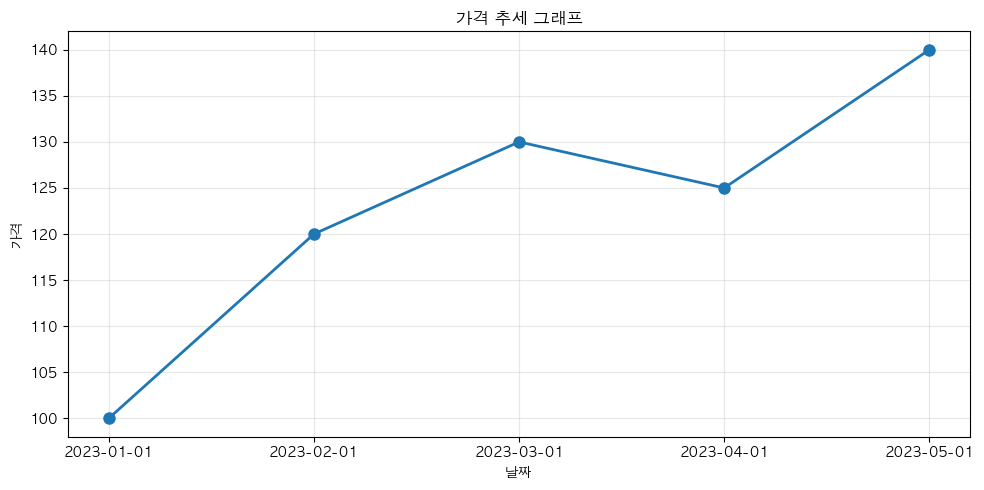

In [84]:
# 3. 시각화 및 시계열 데이터 활용
# - 아래 데이터를 pandas와 matplotlib를 사용해 시계열 그래프로 시각화하세요.
# - - 데이터:
# Date       | Price
# -----------------
# 2023-01-01 | 100
# 2023-02-01 | 120
# 2023-03-01 | 130
# 2023-04-01 | 125
# 2023-05-01 | 140
# - - X축은 날짜, Y축은 가격으로 설정하고, 가격의 추세를 선 그래프로 나타내세요.

import pandas
import matplotlib.pyplot as plt

data = {
    'Date': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01'],
    'Price': [100, 120, 130, 125, 140]
}

df = pd.DataFrame(data)

# 선 그래프 시각화
plt.rcParams['font.family'] = 'AppleGothic' 
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-', linewidth=2, markersize=8)

plt.xlabel("날짜") 
plt.ylabel("가격")  
plt.title("가격 추세 그래프")  
plt.grid(True, alpha=0.3)

# plt.xticks(rotation=45)  
plt.tight_layout()